In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2)

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [2]:
from tensorflow import keras

model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [3]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('h5/best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 17ms/step - loss: 0.6913 - accuracy: 0.5440 - val_loss: 0.6899 - val_accuracy: 0.5658
Epoch 2/100
  9/313 [..............................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5903

C:\Users\gyeol\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 16ms/step - loss: 0.6881 - accuracy: 0.5814 - val_loss: 0.6864 - val_accuracy: 0.5812
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6836 - accuracy: 0.5963 - val_loss: 0.6814 - val_accuracy: 0.5958
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6774 - accuracy: 0.6052 - val_loss: 0.6745 - val_accuracy: 0.6064
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6688 - accuracy: 0.6181 - val_loss: 0.6649 - val_accuracy: 0.6172
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6570 - accuracy: 0.6331 - val_loss: 0.6516 - val_accuracy: 0.6280
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6407 - accuracy: 0.6503 - val_loss: 0.6338 - val_accuracy: 0.6496
Epoch 8/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6187 - accuracy: 0.6691 - val_loss: 0.6080 - val_accuracy: 0.6704
Epoc

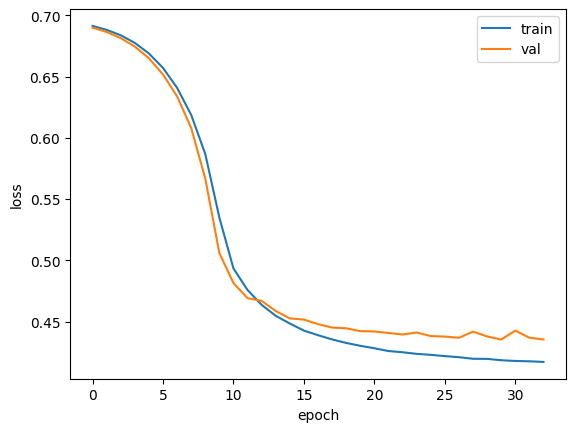

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()